In [ ]:
#1. do the essential imports
#2. get dataset(train/validation set)
#3. view dataset stats
#4. do feature normalization
#5. create the model and compile it with loss, metrics and optimizer
#6. do the model training by feeding in train/dev set
#7. see the historrry object
#8. write early stopping code
#9. make the predictions on test set

In [1]:
#we aim to predict the continuous value like probability
#do neccessary imports
import tensorflow as tf
import keras
import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.


Using TensorFlow backend.


In [4]:
#2. do the dataset load
housing_dataset = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = housing_dataset.load_data()
#do the random shuffling of data
# Shuffle the training set
order       = np.argsort(np.random.random(train_labels.shape))
train_data  = train_data[order]
train_labels = train_labels[order]
print("Randomization done....")

Randomization done....


In [5]:
#3. look at dataset stats
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [11]:
#use pandas to view dataset in nice table format
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()
# print(df.head())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [12]:
#print pricing
print(train_labels[0:10])

[ 32.   27.5  32.   23.1  50.   20.6  22.6  36.2  21.8  19.5]


In [14]:
#feature normalization
#For each feature, subtract the mean of the feature and divide by the standard deviation: and is recommended to do it
# Test data is *not* used when calculating the mean and std.
mean = train_data.mean(axis=0)
print("Mean is " + str(mean))
std  = train_data.std(axis=0)
print("sd is " + str(std))
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
print(train_data[0])
#Although the model might converge without feature normalization, 
#it makes training more difficult, and it makes the resulting model more dependant on the choice
#of units used in the input.

Mean is [  3.74511057e+00   1.14801980e+01   1.11044307e+01   6.18811881e-02
   5.57355941e-01   6.26708168e+00   6.90106436e+01   3.74027079e+00
   9.44059406e+00   4.05898515e+02   1.84759901e+01   3.54783168e+02
   1.27408168e+01]
sd is [  9.22929073e+00   2.37382770e+01   6.80287253e+00   2.40939633e-01
   1.17147847e-01   7.08908627e-01   2.79060634e+01   2.02770050e+00
   8.68758849e+00   1.66168506e+02   2.19765689e+00   9.39946015e+01
   7.24556085e+00]
[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [16]:
#build the model
#loss is mean square error
#mean absolute error is the metric used
def build_model():
    #2 densely connected hidden layers
    #output layer that returns a single probability number
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Display training progress by printing a single dot for each completed epoch.
from __future__ import print_function
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end=' ')


EPOCHS = 500
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])
print("Training finishes...")



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

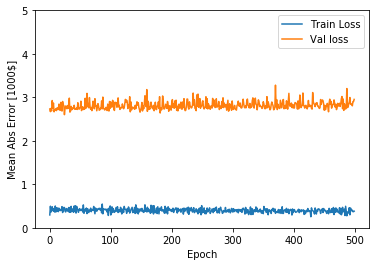

In [33]:
#plot the history which helps us decide how long to train before model stops making progress
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0,5])
    plt.plot()
plot_history(history)



. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

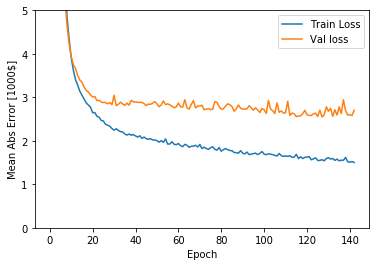

In [34]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
# If a set amount of epochs elapses without showing improvement, then automatically stop the training.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)


In [35]:
#do predictions on test set
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))


Testing set Mean Abs Error: $2668.79


In [36]:
#do predictions on test set
test_predictions = model.predict(test_data).flatten()